# Import Python Libraries

In [9]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from sqlalchemy import create_engine
#from pandas_profiling import ProfileReport
from matplotlib import ticker
from matplotlib.ticker import AutoMinorLocator
sns.set_style('white')

In [10]:
#Autocompletador
%config Completer.use_jedi=False

In [11]:
engine=create_engine('sqlite:///Data/CO2_EOR.db')


# Graficas Refineria Shushufindi


In [13]:
df_rf=pd.read_sql_query("SELECT* FROM R_Shushufindi", engine)
print(df_rf.columns)

Index(['Refineria', 'año', 'RefinacionBarriles', 'Emisiones_CO2'], dtype='object')


In [ ]:
#df.set_index('año')

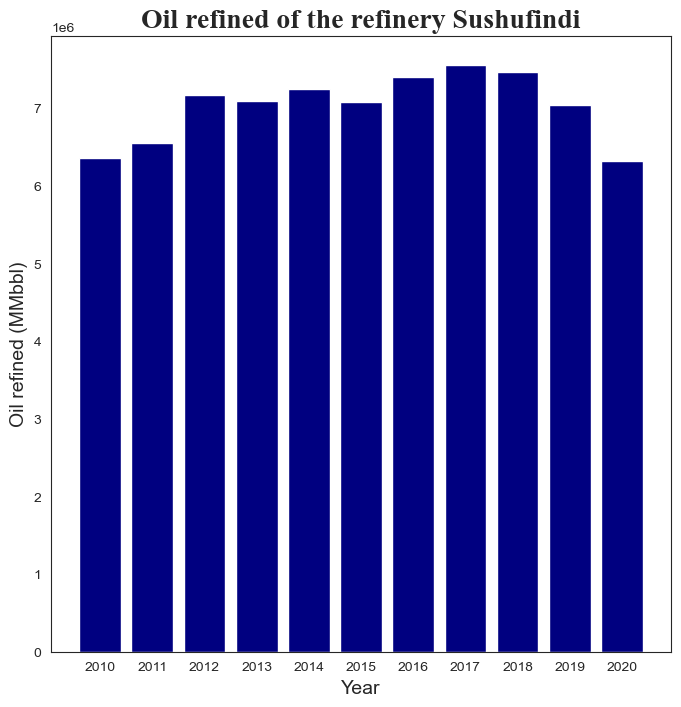

In [15]:
fig1, ax = plt.subplots(figsize=(8,8))

ax.bar(df_rf['año'], df_rf['RefinacionBarriles'], color='navy')
ax.set_xlabel('Year', fontsize=14)
ax.set_ylabel('Oil refined (MMbbl)', fontsize=14)
#ax.set_xticks(ax.get_xticks())
ax.set_title('Oil refined of the refinery Sushufindi',
             fontname="Times New Roman", size=20,fontweight="bold")
plt.xticks([2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020])
plt.show()
#df.iloc[6:].set_index("año")["RefinacionBarriles"].plot(kind="bar",ylabel="Barriles Refinados",title="Producción anual de la refineria de Shushufindi")

NameError: name 'df' is not defined

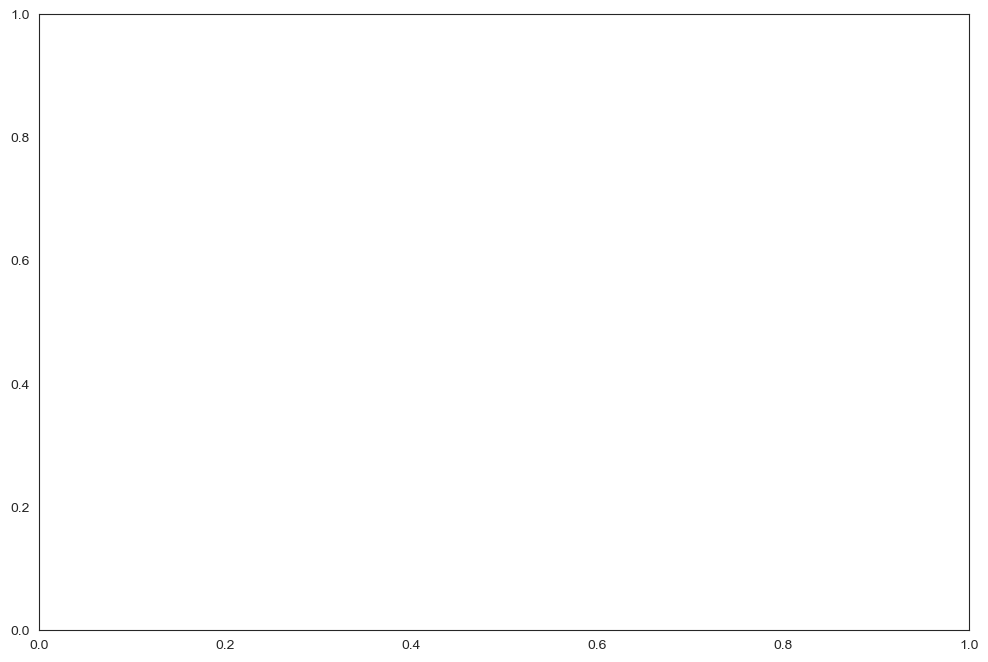

In [16]:
fig2 = plt.subplots(figsize=(12,8))
ax = sns.lineplot(data=df_rf, x='año', y='RefinacionBarriles', color='navy')
ax.set_xlabel('Year', fontsize=14)
ax.set_ylabel('Oil refined (MMbbl)', fontsize=14)
ax.fill_between(df_rf.año, df_rf.RefinacionBarriles, alpha=0.1, color='navy')
ax.set_xlim(df_rf.año.min(), df_rf.año.max())
ax.set_ylim(0)
plt.xticks([2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020])
ax.set_title('Oil refined of the refinery Sushufindi',
             fontname="Times New Roman", size=20,fontweight="bold")
plt.show()

In [ ]:
fig3, ax = plt.subplots(figsize=(12,8))

ax.bar(df['año'], df['Emisiones_CO2'], color='brown')
ax.set_xlabel('Year', fontsize=14)
ax.set_ylabel(r'$CO_{2}$ emissions (Ton)', fontsize=14)
ax.set_title(r'$CO_{2}$ emissions of the refinery Sushufindi',
             fontname="Times New Roman", size=20,fontweight="bold")
plt.xticks([2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020])
ax.yaxis.set_minor_locator(AutoMinorLocator())
plt.show()
#df.iloc[6:].set_index("año")['Emisiones_CO2'].plot(kind="bar",ylabel="Emisiones de CO2 |Ton|",title="Emisiones de CO2 de la refineria de Shushufindi",color=["orange"])


In [ ]:
fig4 = plt.subplots(figsize=(12,8))
ax = sns.lineplot(data=df, x='año', y='Emisiones_CO2', color='brown')
ax.set_xlabel('Year', fontsize=14)
ax.set_ylabel(r'$CO_{2}$ emissions (Ton)', fontsize=14)
ax.fill_between(df.año, df.Emisiones_CO2, alpha=0.1, color='brown')
ax.set_xlim(df.año.min(), df.año.max())
ax.set_ylim(0)
plt.xticks([2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020])
ax.set_title(r'$CO_{2}$ emissions of the refinery Sushufindi',
             fontname="Times New Roman", size=20,fontweight="bold")
plt.show()

In [ ]:
formatter = ticker.EngFormatter()
fig5 = plt.figure(figsize=(18,12), edgecolor='black')
ax1 = fig5.add_subplot()
ax2 = ax1.twinx()

ener = df.plot.bar(x='año', y='RefinacionBarriles', width=0.4, color='navy',
                                         ax=ax1, align='center', label='Oil refined', position=1)
emi = df.plot.bar(x='año', y='Emisiones_CO2', width=0.4, color='red',
                                      ax=ax2, align='center', label=r'$CO_{2}$ emissions', position=0)

#ax1.bar(df['año'], df['RefinacionBarriles'], color='blue', label='Oil refined')
#ax2 = ax1.twinx()
#ax2.bar(df['año'], df['Emisiones_CO2'], color='orange', label='CO2 emissions')
ax1.set_xlabel('', fontsize=14)
ax1.set_ylabel('Oil refined (Mbbl)', fontsize=22)
ax2.set_ylabel(r'$CO_{2}$ emissions (kTon)', fontsize=22)
ax1.tick_params(axis='x', labelsize=22)
ax1.tick_params(axis='y', labelsize=22)
ax2.tick_params(axis='y', labelsize=22)
ax1.yaxis.set_major_formatter(formatter)
ax2.yaxis.set_major_formatter(formatter)
ax2.set_ylim(0, 250E3)
ax1.legend(loc='upper center', fontsize=20, bbox_to_anchor =(0.4,1))
ax2.legend(loc='upper right', fontsize=20, bbox_to_anchor =(0.75,1))
ax2.grid(visible=False)
ax1.tick_params(axis='x', labelrotation = 0)
ax1.set_ylim(0, 10E6)
#plt.title(r'Oil refined and $CO_{2}$ emissions of the refinery Sushufindi', fontname="Times New Roman", size=20,fontweight="bold")
plt.show()

#R_barras=df.iloc[6:].set_index("año").plot(kind="bar",stacked=True,title="Producción anual de la refineria de Shushufindi")

In [ ]:
fig5.savefig('refinery')

# Graficas Termoelectricas

In [6]:
df_ter=pd.read_sql_query("SELECT* FROM Data_Thermo", engine)
df_ter.head()

,termoeléctrica,año,Energía Bruta (GWH),Energía Bruta (MWH),Diésel (gal),Disel (TEP),Fuel-Oil (gal),Fuel-Oil (TEP),Gas Natural (kpc),Gas Natural (TEP),crudo (gal),crudo (TEP)
0,Amazonas,2020,10.57,10571.86,5382.01,17.77,,,,,717784.2,2443.87
1,Amazonas,2019,10.59,10594.39,4293.96,14.18,,,,,721514.64,2456.57
2,Amazonas,2018,9.96,9962.33,3018,9.97,,,,,658382.34,2241.62
3,Amazonas,2017,9.94,9936.76,5864,19.36,,,,,651811.44,2219.25
4,Amazonas,2016,9.57,9568.65,9585,31.65,,,,,653206.26,2223.99


In [8]:
print(df_ter.columns)

d=df_fact.loc['diesel','NCV']


Index(['termoeléctrica', 'año', 'Energía Bruta (GWH)', 'Energía Bruta (MWH)',
       'Diésel (gal)', 'Disel (TEP)', 'Fuel-Oil (gal)', 'Fuel-Oil (TEP)',
       'Gas Natural (kpc)', 'Gas Natural (TEP)', 'crudo (gal)', 'crudo (TEP)'],
      dtype='object')

In [7]:
df_ter["Emisiones"] = ((df_ter["Diésel (gal)"]*3.78546*df_fact["NCV"]=""/1000)*

NameError: name 'df' is not defined

In [ ]:
ter["Termoelectrica"].unique()

In [ ]:
ter_1 = ter[ter["Termoelectrica"]=="Repsol YPF-NPF-5"]
ter_2 = ter[ter["Termoelectrica"]=="Repsol YPF-NPF-4"]
ter_3 = ter[ter["Termoelectrica"]=="Repsol YPF-NPF-3"]
ter_4 = ter[ter["Termoelectrica"]=="Repsol YPF-NPF-2"]
ter_5 = ter[ter["Termoelectrica"]=="Repsol YPF-NPF-1"]

ter_rep = pd.concat([ter_1, ter_2, ter_3, ter_4, ter_5])
ter_rep["Termoelectrica"] = "Repsol YPF-NPF"
ter_rep

In [ ]:
ter_ama = ter[ter['Termoelectrica']=='Amazonas']
ter_ama

In [ ]:
ter_ama["Diesel"] = np.array([9585, 5864, 3018, 4293.96, 5382.01]) * 0.0013368056
ter_ama["Crude oil"] = np.array([653206.26, 651811.44, 658382.34, 721514.64, 717784.2]) * 0.0013368056

In [ ]:
ter_ama = ter_ama[["año", "Diesel", "Crude oil"]]
ter_ama

In [ ]:
ter_ama["Net energy"] = ter_ama["Diesel"] * 40.8 + ter_ama["Crude oil"] * 44.8
#ter_ama["CO2 Emissions"] = (ter_ama["Diesel"] * 40.8 * 72.6) + (ter_ama["Crude oil"] * 44.8 * 79.85)
ter_ama

In [ ]:
fig6, ax = plt.subplots(figsize=(12,8))

ax.bar(ter_ama['año'], ter_ama['EnergiaBruta(MWH)'], color='seagreen')
ax.set_xlabel('Year', fontsize=14)
ax.set_ylabel('Net energy (MWH)', fontsize=14)
ax.set_title('Anual energy production of the thermal plant Amazonas',
             fontname="Times New Roman", size=20,fontweight="bold")
plt.show()

#ter.iloc[:5].set_index("año")['EnergiaBruta(MWH)'].plot(kind="bar",ylabel="EnergiaBruta(MWH)",title="Producción anual de Energia de la central Térmica Amazonas",color=["green"])

In [ ]:
fig7, ax = plt.subplots(figsize=(12,8))

ax.bar(ter_ama['año'], ter_ama['EmisionCO2[Ton]'], color='red')
ax.set_xlabel('Year', fontsize=14)
ax.set_ylabel(r'$CO_{2}$ emissions (Ton)', fontsize=14)
ax.set_title(r'Anual $CO_{2}$ emissions of the thermal plant Amazonas',
             fontname="Times New Roman", size=20,fontweight="bold")
plt.show()

#ter.iloc[:5].set_index("año")['EmisionCO2[Ton]'].plot(kind="bar",ylabel="'EmisionCO2[Ton]'",title="Emisiones de CO2 anual de la central Térmica Amazonas",color=["red"])

In [ ]:
fig8, ax1 = plt.subplots(figsize=(12,8))

ener = ax1.bar(ter_ama['año'], ter_ama['EnergiaBruta(MWH)'], width=0.5, color='seagreen', align='center')
ax2 = ax1.twinx()
emi = ax2.bar(ter_ama['año'], ter_ama['EmisionCO2[Ton]'], width=0.5, color='red', align='center')
ax1.set_xlabel('Year', fontsize=14)
ax1.set_ylabel('Net energy (MWH)', fontsize=14)
ax2.set_ylabel(r'$CO_{2}$ emissions (Ton)', fontsize=14)
ax2.grid(visible=False)
plt.xticks([2016, 2017, 2018, 2019, 2020])
plt.legend([ener, emi], ['Net energy', r'$CO_{2}$ emissions'])
plt.title(r'Energy production and $CO_{2}$ emissions of the thermal plant Amazonas',
          fontname="Times New Roman", size=20, fontweight="bold")
plt.show()

#ter.iloc[:5].set_index("año").plot(kind="bar",stacked=True,title="Producción anual de la la central Térmica Amazonas")

In [ ]:
fig9 = plt.figure(figsize=(12,8), edgecolor='black')
ax1 = fig9.add_subplot()
ax2 = ax1.twinx()

ter.groupby(['año', 'Termoelectrica'])['EnergiaBruta(MWH)'].sum().plot(kind='bar', width=0.5, color='seagreen',
                                                                       ax=ax1, label='Net energy')
ter.groupby(['año', 'Termoelectrica'])['EmisionCO2[Ton]'].sum().plot(kind='bar', width=0.5, color='red',
                                                                     ax=ax2, label=r'$CO_{2}$ emissions')
ax1.set_xlabel('Year', fontsize=14)
ax1.set_ylabel('Net energy (MWh)', fontsize=14)
ax2.set_ylabel(r'$CO_{2}$ emissions (Ton)', fontsize=14)
ax1.legend(loc='upper center')
ax2.legend(loc='upper right')
ax2.grid(visible=False)
plt.title(r'Energy production and $CO_{2}$ emissions of the thermal plants',
          fontname="Times New Roman", size=20, fontweight="bold")
plt.show()

In [ ]:
#ter_ama = ter_ama.set_index('año')

In [ ]:
fig10 = plt.figure(figsize=(12,8), edgecolor='black')
ax1 = fig10.add_subplot()
ax2 = ax1.twinx()

ener = ter_ama.set_index('año')['Net energy'].plot(kind='bar', width=0.4, color='seagreen',
                                         ax=ax1, align='center', label='Net energy', position=1)
emi = ter_ama.set_index('año')['CO2 Emissions'].plot(kind='bar', width=0.4, color='red',
                                      ax=ax2, align='center', label=r'$CO_{2}$ emissions', position=0)
ax1.set_xlabel('Year', fontsize=14)
ax1.set_ylabel('Net energy (MWH)', fontsize=14)
ax2.set_ylabel(r'$CO_{2}$ emissions (Ton)', fontsize=14)
ax1.legend(loc='upper center')
ax2.legend(loc='upper right')
plt.title(r'Energy production and $CO_{2}$ emissions of the thermal plant Amazonas',
          fontname="Times New Roman", size=20, fontweight="bold")
ax1.tick_params(axis='x', labelrotation = 0)
ax2.grid(visible=False)
plt.show()

In [ ]:
fig10.savefig('thermal_plants')

In [ ]:
fig11, axes = plt.subplots(2, 1, figsize=(12,12))

axes[0].bar(ter_ama['año'], ter_ama['EnergiaBruta(MWH)'], width=0.5, color='seagreen', align='center')
axes[1].bar(ter_ama['año'], ter_ama['EmisionCO2[Ton]'], width=0.5, color='red', align='center')
#axes[0].set_xlabel('Year', fontsize=14)
axes[0].set_ylabel('Net energy (MWH)', fontsize=14)
axes[1].set_ylabel(r'$CO_{2}$ emissions (Ton)', fontsize=14)
fig11.suptitle(r'Energy production and $CO_{2}$ emissions of the thermal plant Amazonas',
             fontname="Times New Roman", size=20, fontweight="bold")
plt.show()

# Secoya Thermal plant

In [ ]:
ter_se = ter[ter['Termoelectrica']=='Secoya'].sort_values(by='año')
ter_se

In [ ]:
formatter = ticker.EngFormatter()
fig20 = plt.figure(figsize=(18,12), edgecolor='black')
ax1 = fig20.add_subplot()
ax2 = ax1.twinx()

ener = ter_se.set_index('año')['EnergiaBruta(MWH)'].plot(kind='bar', width=0.4, color='seagreen',
                                         ax=ax1, align='center', label='Net energy', position=1)
emi = ter_se.set_index('año')['EmisionCO2[Ton]'].plot(kind='bar', width=0.4, color='red',
                                      ax=ax2, align='center', label=r'$CO_{2}$ emissions', position=0)
ax1.set_xlabel('', fontsize=22)
ax1.set_ylabel('Net energy (MWH)', fontsize=22)
ax2.set_ylabel(r'$CO_{2}$ emissions (kTon)', fontsize=22)
ax1.tick_params(axis='x', labelsize=22)
ax1.tick_params(axis='y', labelsize=22)
ax2.tick_params(axis='y', labelsize=22)
ax1.yaxis.set_major_formatter(formatter)
ax2.yaxis.set_major_formatter(formatter)
ax1.set_ylim(0, 200E3)
ax2.set_ylim(0, 200E3)
ax1.legend(loc='upper center', fontsize=20, bbox_to_anchor =(0.4,1))
ax2.legend(loc='upper right', fontsize=20, bbox_to_anchor =(0.75,1))
#plt.title(r'Energy production and $CO_{2}$ emissions of the thermal plant Secoya',
#          fontname="Times New Roman", size=20, fontweight="bold")
ax1.tick_params(axis='x', labelrotation = 0)
ax2.grid(visible=False)
plt.show()

In [ ]:
fig20.savefig('Secoya plant')

# Repsol Thermal Plant

In [ ]:
formatter = ticker.EngFormatter()
fig21 = plt.figure(figsize=(18,12), edgecolor='black')
ax1 = fig21.add_subplot()
ax2 = ax1.twinx()

ener = ter_rep.set_index('año')['EnergiaBruta(MWH)'].plot(kind='bar', width=0.4, color='seagreen',
                                         ax=ax1, align='center', label='Net energy', position=1)
emi = ter_rep.set_index('año')['EmisionCO2[Ton]'].plot(kind='bar', width=0.4, color='red',
                                      ax=ax2, align='center', label=r'$CO_{2}$ emissions', position=0)
ax1.set_xlabel('', fontsize=22)
ax1.set_ylabel('Net energy (MWH)', fontsize=22)
ax2.set_ylabel(r'$CO_{2}$ emissions (kTon)', fontsize=22)
ax1.tick_params(axis='x', labelsize=22)
ax1.tick_params(axis='y', labelsize=22)
ax2.tick_params(axis='y', labelsize=22)
ax1.yaxis.set_major_formatter(formatter)
ax2.yaxis.set_major_formatter(formatter)
ax1.set_ylim(0, 200E3)
ax2.set_ylim(0, 200E3)
ax1.legend(loc='upper center', fontsize=20, bbox_to_anchor =(0.5,1))
ax2.legend(loc='upper right', fontsize=20, bbox_to_anchor =(0.85,1))
#plt.title(r'Energy production and $CO_{2}$ emissions of the thermal plant Secoya',
#          fontname="Times New Roman", size=20, fontweight="bold")
ax1.tick_params(axis='x', labelrotation = 0)
ax2.grid(visible=False)
plt.show()

In [ ]:
fig21.savefig('Repsol plant')

# PROMEDIO

In [ ]:
terP=pd.read_sql_query("SELECT* FROM Termoelectricas_datos_promedio", engine)
terP.columns

In [ ]:
terP

In [ ]:
fig12, ax = plt.subplots(figsize=(12,8))

ax.bar(terP['Termoeléctrica'], terP['EnergiaBruta_MWH'], color='blue')
ax.set_xlabel('Thermal plants', fontsize=14)
ax.set_ylabel('Net energy (MWH)', fontsize=14)
plt.xticks(rotation=45)
ax.set_title('Average energy production (2016-2020) of thermal plants located in the amazon region of Ecuador',
             fontname="Times New Roman", size=20,fontweight="bold")
plt.show()

#terP.set_index('Termoeléctrica')['EnergiaBruta_MWH'].plot(kind="bar",ylabel="EnergiaBruta(MWH)",title="Producción  de energia promedio (2016-2020) de las termoelécticas en la Amazonia Ecuatoriana",color=["blue"])

In [ ]:
fig13, ax = plt.subplots(figsize=(12,8))

ax.bar(terP['Termoeléctrica'], terP['Emision_TCO2'], color='red')
ax.set_xlabel('Thermal plants', fontsize=14)
ax.set_ylabel(r'$CO_{2}$ emissions (Ton)', fontsize=14)
plt.xticks(rotation=45)
ax.set_title(r'Average $CO_{2}$ emissions (2016-2020) of thermal plants located in the amazon region of Ecuador',
             fontname="Times New Roman", size=20,fontweight="bold")
plt.show()

#terP.set_index('Termoeléctrica')['Emision_TCO2'].plot(kind="bar",ylabel="Emision_TCO2",title="Emisiones de CO2 promedio (2016-2020)  de las termoelécticas en la Amazonia Ecuatoriana ",color=["red"])

In [ ]:
terP

In [ ]:
formatter = ticker.EngFormatter()
fig14 = plt.figure(figsize=(18,12), edgecolor='black')
ax1 = fig14.add_subplot()
ax2 = ax1.twinx()


ener = terP.plot.bar(x='Termoeléctrica', y='EnergiaBruta_MWH', width=0.4, color='seagreen',
                                         ax=ax1, align='center', label='Net energy', position=1)
emi = terP.plot.bar(x='Termoeléctrica', y='Emision_TCO2', width=0.4, color='red',
                                      ax=ax2, align='center', label=r'$CO_{2}$ emissions', position=0)

ax1.set_xlabel('', fontsize=20)
ax1.set_ylabel('Net energy (MWH)', fontsize=22)
ax2.set_ylabel(r'$CO_{2}$ emissions (kTon)', fontsize=22)
ax1.tick_params(axis='x', labelrotation =25, labelsize=22)
ax1.tick_params(axis='y', labelsize=22)
ax2.tick_params(axis='y', labelsize=22)
ax1.yaxis.set_major_formatter(formatter)
ax2.yaxis.set_major_formatter(formatter)
ax1.set_ylim(0, 200E3)
ax2.set_ylim(0, 200E3)
ax1.legend(loc='upper center', fontsize=20, bbox_to_anchor =(0.4,1))
ax2.legend(loc='upper right', fontsize=20, bbox_to_anchor =(0.75,1))
#ax1.grid(visible=False)
ax2.grid(visible=False)
#plt.title(r'Average $CO_{2}$ emissions and energy production (2016-2020) of thermal plants located in the amazon region of Ecuador',
#          fontname="Times New Roman", size=20,fontweight="bold")
plt.show()


#bar_termo=terP.set_index('Termoeléctrica').plot(kind="bar",stacked=True,title="Producción promedio (2016-2020) de las termoelécticas en la Amazonia Ecuatoriana",color=["blue","red"])

In [ ]:
fig14.savefig('Thermal_plants_avg')

# Carbon Storage

In [ ]:
oilfield = np.array(["Lago Agrio", "Sacha", "Sacha"])
formation = np.array(["Hs", "Napo(T)", "Hs"])
MCO2_t = np.array([550803.1377, 14993448.64, 57474407.65])
MCO2_Mt = MCO2_t / 1E6

In [ ]:
df_co2 = pd.DataFrame({"Oilfield":oilfield, "Formation":formation, "MCO2(t)":MCO2_t, "MCO2(Mt)":MCO2_Mt})
df_co2

In [ ]:
df_co2["Oilfield"] = df_co2["Oilfield"].replace({"Lago Agrio":1, "Sacha":2})

In [ ]:
fig15 = plt.figure(figsize=(15,11), edgecolor='black')

colors = ["blue", "orange", "gray"]
ax = fig15.add_subplot(111, projection='3d')
ax.bar3d(df_co2["Oilfield"], 0, [0]*3, [0.3]*3, [0.05]*3, df_co2["MCO2(Mt)"], color=colors)
#ax.set_xticklabels(["Lago Agrio", "Sacha", "Sacha_1"], fontsize=18)
plt.rcParams['font.size'] = 18
ax.set_xlabel("Oilfields", fontsize=18)
ax.set_zlabel("MCO2 (Mt)", fontsize=18)
plt.show()